<a href="https://colab.research.google.com/github/faka7/-ALESSANDRA-FLOREZ/blob/main/PhawAI_Machine_learning_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Regresión lineal

La regresión lineal es un método estadístico utilizado para modelar la relación entre una variable dependiente (respuesta) y una o más variables independientes (predictoras).

# Tipos de regresión lineal
Regresión lineal simple: Solo una variable independiente.
Ejemplo: predecir el peso según la altura.

Regresión lineal múltiple: Dos o más variables independientes.
Ejemplo: predecir el precio de una casa usando tamaño, número de habitaciones, ubicación, etc.


## 1. Regresión lineal simple

Esta es la forma más simple de regresión lineal y solo implica una variable independiente y una variable dependiente. La ecuación de la regresión lineal simple es:

$$
y = \beta_{0} + \beta_{1}X \\
$$

Donde:

- Y es la variable dependiente
- X es la variable independiente
- β0 es la intersección, es decir, el punto donde la línea de regresión interseca el eje y.
- β1 es la pendiente, que controla la inclinación de la línea. Si elegimos dos puntos cualesquiera en una línea, la pendiente es el cociente entre la distancia vertical y la horizontal entre esos puntos; esto se suele escribir como elevación/recorrido.
El siguiente gráfico muestra una línea con la ecuación y = 2x + 12:

## 2. Regresión lineal múltiple

Esto implica más de una variable independiente y una variable dependiente. La ecuación de la regresión lineal múltiple es:

$$
y = \beta_{0}+\beta_{1}X1+\beta_{2}X2+.........\beta_{n}Xp \\
$$

Donde:

- Y es la variable dependiente
- X1, X2, …, Xp son las variables independientes
- β0 es la intersección
- β1, β2, …, βn son las pendientes

El objetivo del algoritmo es encontrar la ecuación de la recta de ajuste óptima que prediga los valores basándose en las variables independientes.

In [ ]:
# 1. Importar las bibliotecas necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



### Conjunto de datos: California Housing Dataset
Nombre en scikit-learn: fetch_california_housing()

Descripción: Predice el precio medio de casas en distritos de California usando variables como ingreso medio, número de habitaciones, etc.

In [ ]:
# 2. Cargar datos
data = fetch_california_housing(as_frame=True)
df = data.frame  # DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# 3. Inspeccionar los datos

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

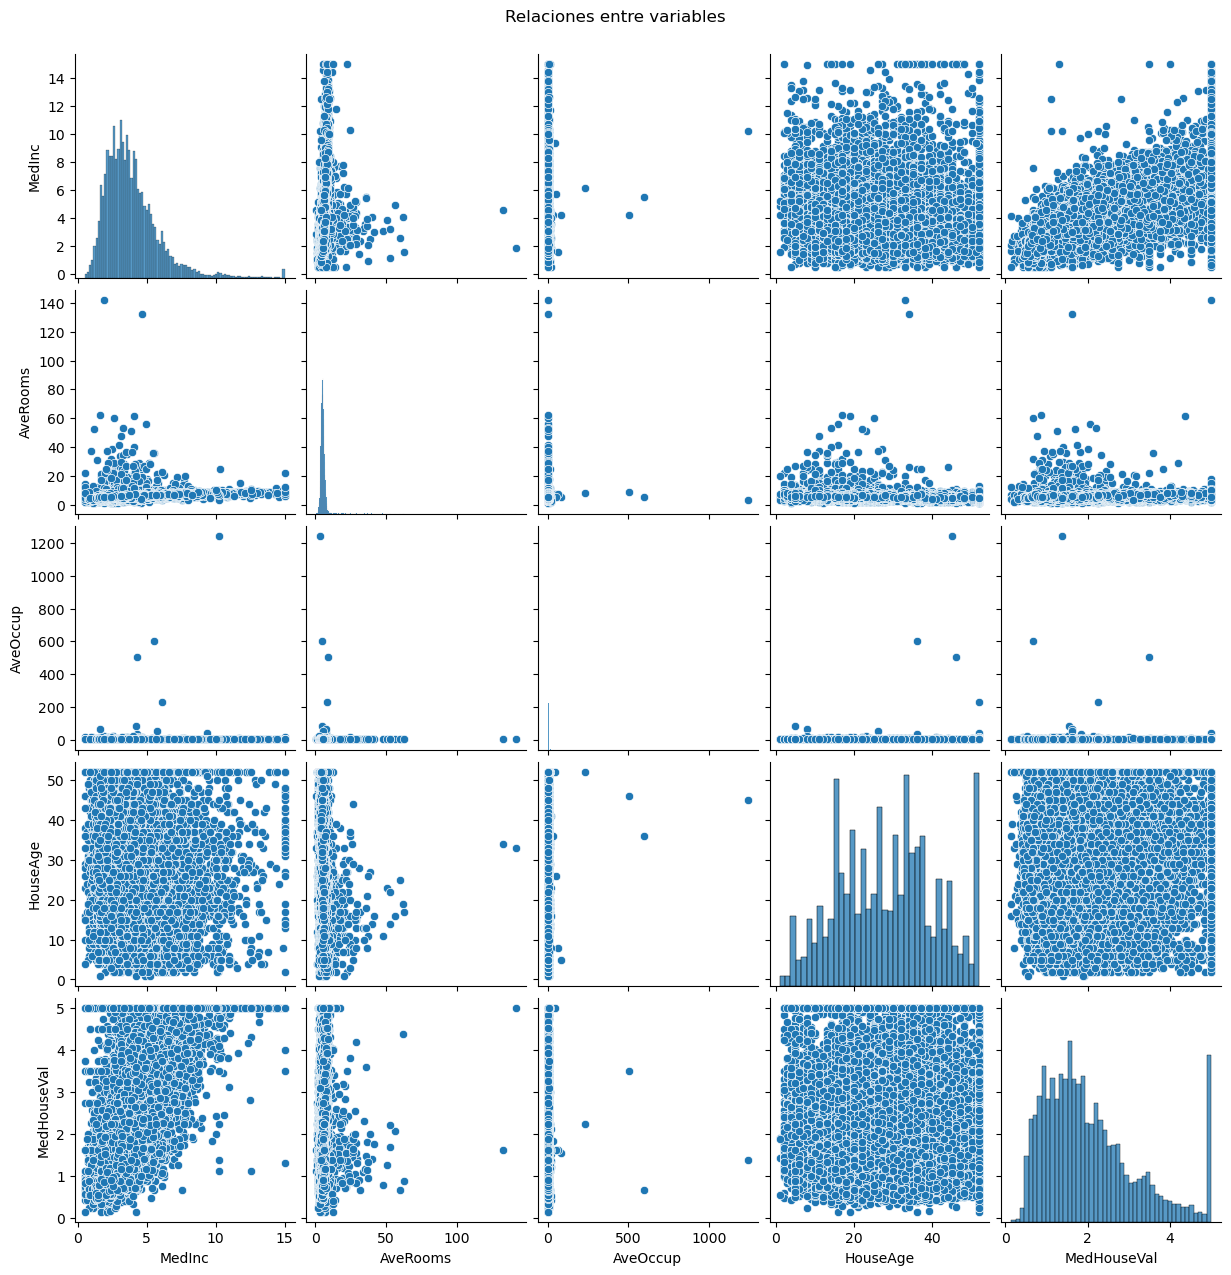

In [ ]:
# 4. Visualizar la relación entre las variables
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'MedHouseVal']])
plt.suptitle("Relaciones entre variables", y=1.02)
plt.show()

In [ ]:
# 5. Separar variables independientes y dependiente

X = df.drop(columns='MedHouseVal')  # variables independientes
y = df['MedHouseVal']  # variable dependiente


In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
# 6. Separar datos en conjuntos de entrenamiento y prueba


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [ ]:
y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 16512, dtype: float64

In [ ]:
# 7. Crear y entrenar el modelo de regresión lineal

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 8. Revisar coeficientes del modelo

coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
})
print(f"Intercepto: {modelo.intercept_:.4f}")
print(coeficientes)

Intercepto: -37.0233
     Variable  Coeficiente
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708



### Ecuación del modelo de regresión lineal múltiple

El modelo entrenado tiene la siguiente forma:

MedHouseVal = intercepto + coef1 * MedInc + coef2 * HouseAge + coef3 * AveRooms + ...
Y = -37.02 +0.44*(1) +0.0097*(0.05).....

In [ ]:
# 10. Realizar predicciones sobre el conjunto de prueba

y_pred = modelo.predict(X_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [ ]:
# 11. Evaluar el modelo

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")


Error cuadrático medio (MSE): 0.5559
Coeficiente de determinación (R²): 0.5758


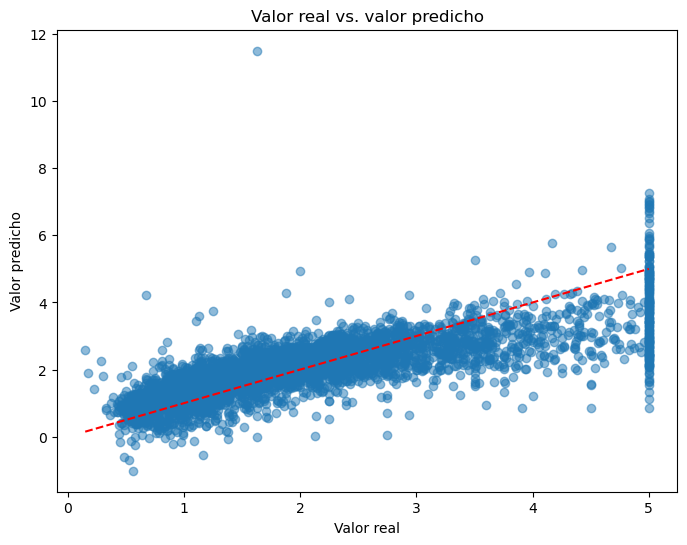

In [ ]:
# 12. Visualizar predicciones frente a valores reales

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Valor real vs. valor predicho')
plt.show()

In [ ]:
# 13. Conclusión
# - Se ha entrenado un modelo de regresión lineal múltiple con datos reales.
# - Se evaluó usando el error cuadrático medio y el coeficiente de determinación.
# - La visualización permite comparar los valores predichos con los reales.
# - Este modelo puede mejorarse usando técnicas como regularización, selección de variables o modelos no lineales.

# Podrías probar con modelos como RandomForestRegressor o XGBoost u otros???


# Agrupamiento con K-Means usando el conjunto de datos Iris


Este notebook explica paso a paso cómo funciona el algoritmo K-Means con un conjunto de datos disponible en scikit-learn.


In [ ]:
# 1. Importar bibliotecas necesarias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
# 2. Cargar el conjunto de datos Iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


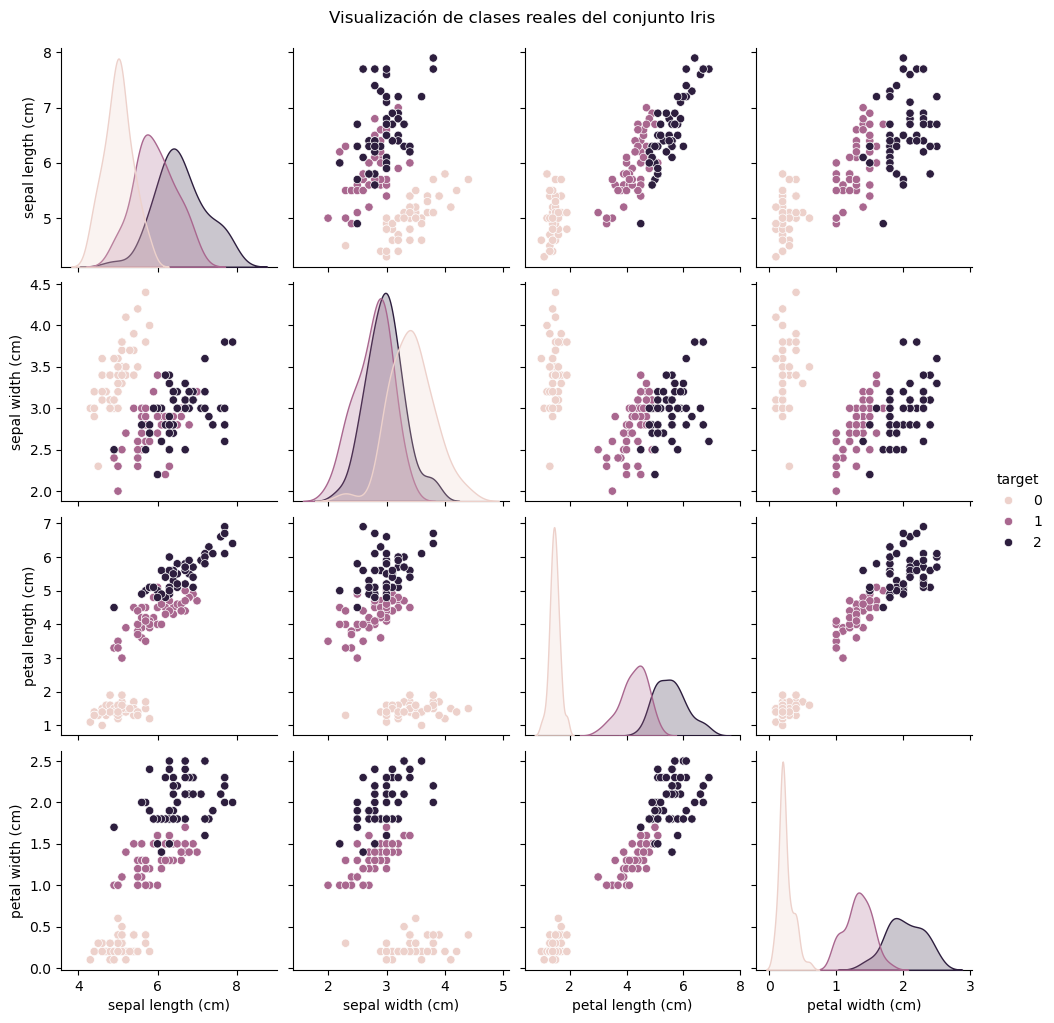

In [ ]:
# 3. Visualizar los datos con las verdaderas etiquetas

sns.pairplot(df, hue='target', vars=data.feature_names)
plt.suptitle("Visualización de clases reales del conjunto Iris", y=1.02)
plt.show()


In [ ]:
df

In [ ]:
# 4. Aplicar el algoritmo K-Means

x = df[data.feature_names]  # Solo usamos las características
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)
df['cluster'] = kmeans.labels_  # Guardar los grupos asignados


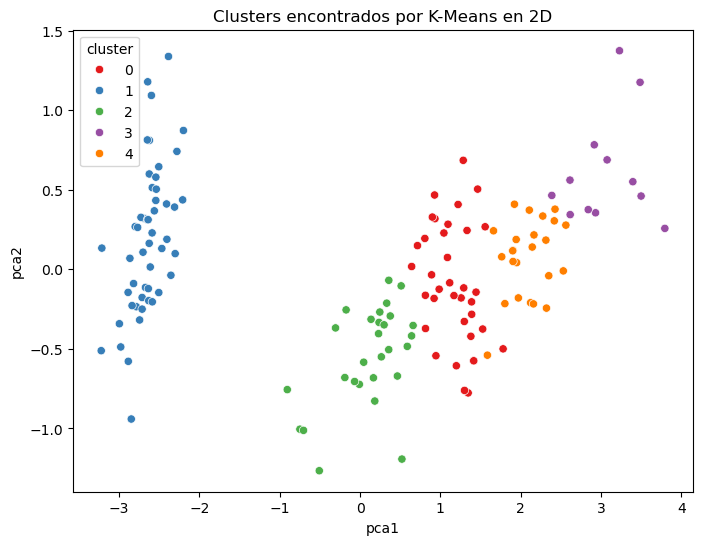

In [ ]:
# 5. Visualizar los clusters asignados por K-Means con reducción de dimensiones (PCA)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
df['pca1'] = x_pca[:, 0]
df['pca2'] = x_pca[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set1')
plt.title("Clusters encontrados por K-Means en 2D")
plt.show()


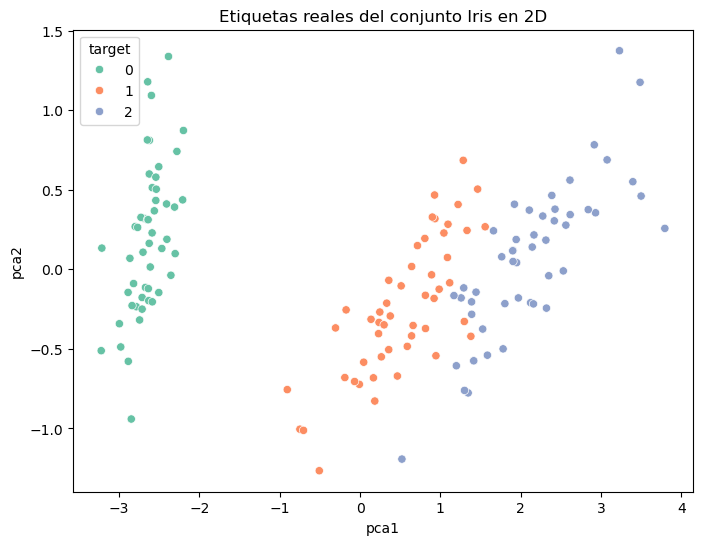

In [ ]:

# 6. Comparar con las etiquetas reales

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='target', data=df, palette='Set2')
plt.title("Etiquetas reales del conjunto Iris en 2D")
plt.show()



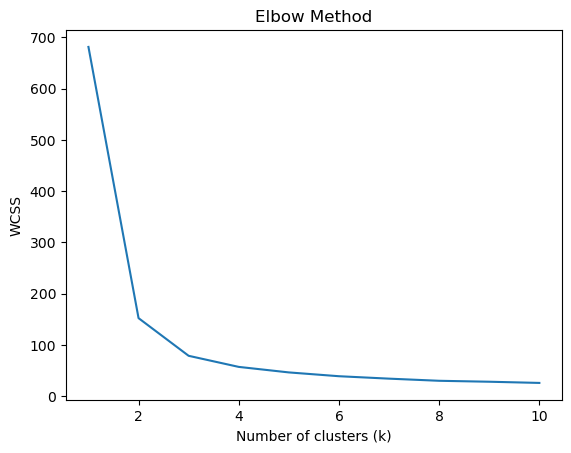

In [ ]:

# Entrenamos varios modelos con k diferentes para identificar el mejor ajuste
# Creamos un arreglo para almacenar los resultados del Within-Cluster Sum of Squares (WCSS)
wcss = []
for i in range(1, 11): # Test k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:

# 7. Conclusión
# - K-Means logró identificar patrones en los datos sin usar las etiquetas reales.
# - La visualización con PCA permitió observar qué tan bien se formaron los grupos.
# - El número de clusters debe elegirse con base en el problema; en este caso usamos 3 porque conocemos que hay tres especies.
